# Multi Linear Regression

# 50_Startups_Data

In [4]:
import numpy as np
import pandas as pd
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv("50_Startups.csv")

In [6]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


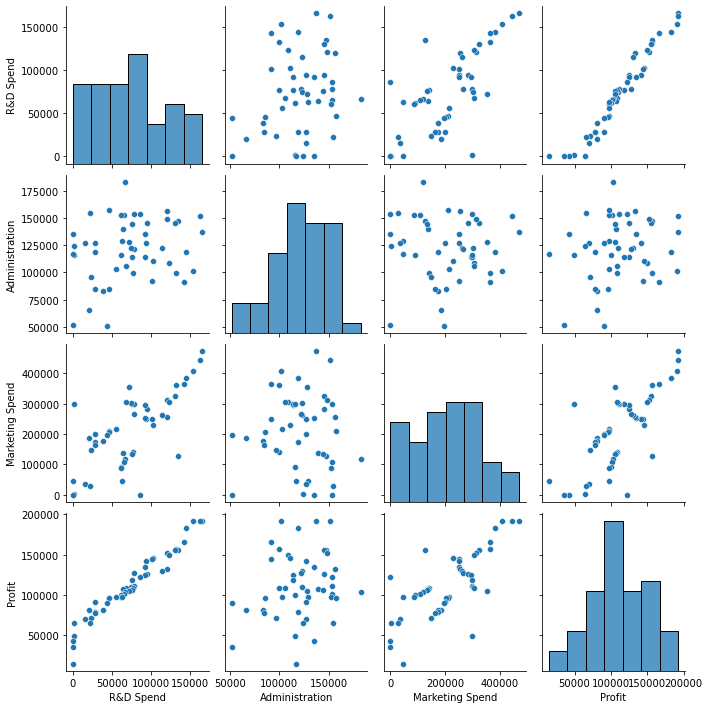

In [7]:
import seaborn as sns
sns.pairplot(data)

In [8]:
data=data.rename({'R&D Spend':'RD'},axis=1)
data=data.rename({'Marketing Spend':'Marketing'},axis=1)

In [9]:
data

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
#build model
import statsmodels.formula.api as smf
model=smf.ols('Profit ~ RD+Administration+Marketing',data=data).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        11:15:53   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# calculating vif 
Rsq_RD=smf.ols('RD ~ Administration+Marketing',data=data).fit().rsquared 
vif_RD = 1/(1-Rsq_RD)

Rsq_Admin=smf.ols('Administration ~ RD+Marketing',data=data).fit().rsquared
vif_Admin = 1/(1-Rsq_Admin)

Rsq_Market=smf.ols('Marketing ~ Administration+RD',data=data).fit().rsquared
vif_Market = 1/(1-Rsq_Market)

vif={'variables':['RD','Admin','Market'],'VIF':[vif_RD,vif_Admin,vif_Market]}
vif=pd.DataFrame(vif)
vif

,variables,VIF
0,RD,2.468903
1,Admin,1.175091
2,Market,2.326773


In [13]:
# residual analysis 
res=model.resid

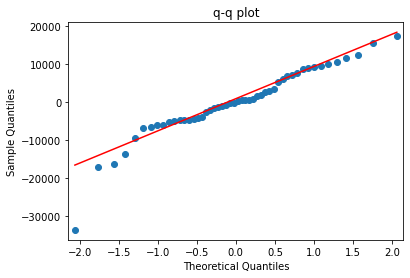

In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(res,line='q')
plt.title('q-q plot')
plt.show()

In [15]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

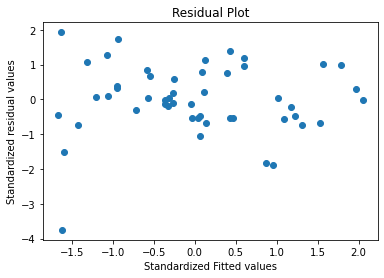

In [17]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [18]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

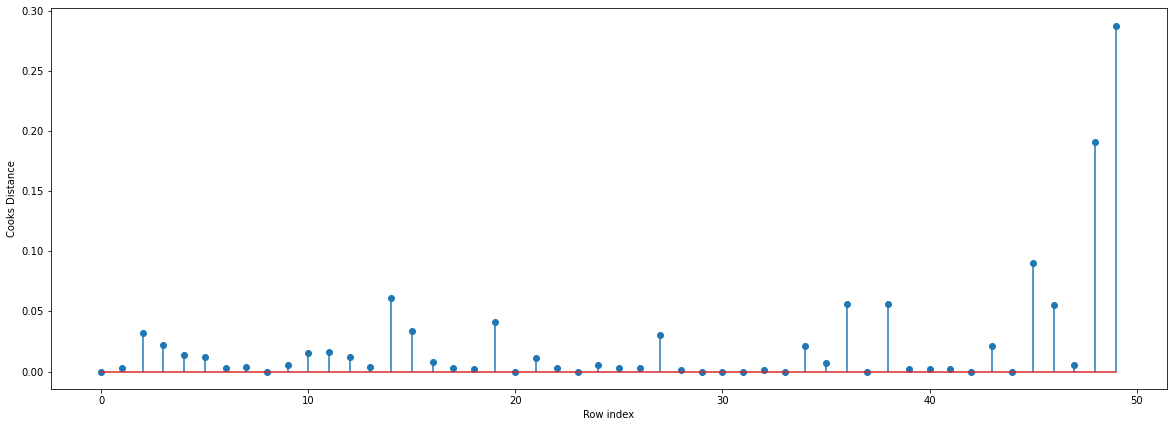

In [19]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [20]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

In [21]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [22]:
leverage_cutoff

0.36

In [23]:
data[data.index.isin([48,49])]

,RD,Administration,Marketing,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [24]:
#improving the model 
data1=data.drop(data.index[[48,49]],axis=0).reset_index()

In [25]:
data1=data1.drop(['index'],axis=1)

In [26]:
data1

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [28]:
#build model new 
model1=smf.ols('Profit ~ RD+Administration+Marketing',data=data1).fit()

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.03e-31
Time:                        11:18:46   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD                 0.7895      0.036     21.718      0.000       0.716       0.863
Administration    -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing          0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

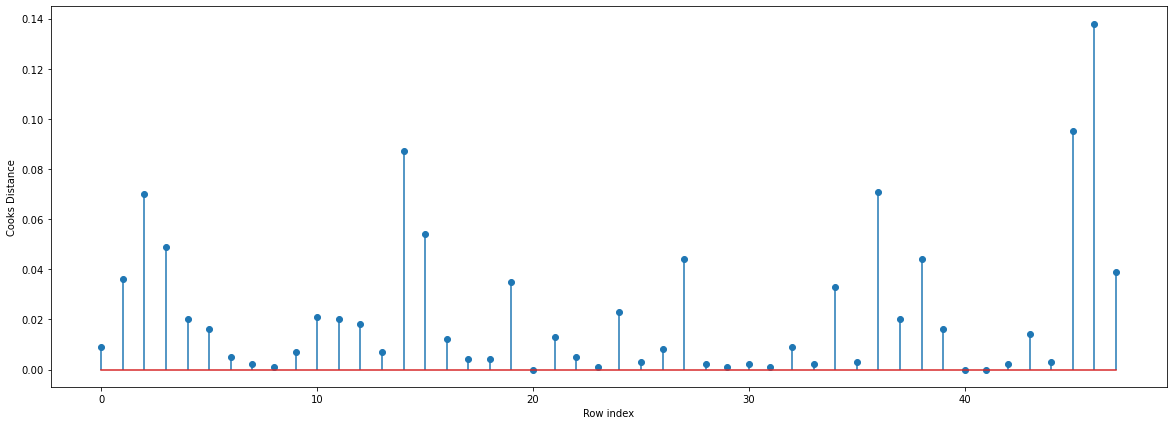

In [32]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
(np.argmax(c),np.max(c))

(46, 0.13829133994334708)

In [34]:
data1[data1.index.isin([46])]

,RD,Administration,Marketing,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75


In [40]:
#improving the model 
data2=data1.drop(data1.index[[46]],axis=0).reset_index()

In [41]:
data2=data2.drop(['index'],axis=1)

In [38]:
data2

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [42]:
#build model2 new 
model2=smf.ols('Profit ~ RD+Administration+Marketing',data=data2).fit()

In [43]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.12e-30
Time:                        11:24:36   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
RD                 0.7642      0.041     18.704      0.000       0.682       0.847
Administration    -0.0532      0.044     -1.202      0.236      -0.142       0.036
Marketing          0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model2_influence=model2.get_influence()
(c, _) = model2_influence.cooks_distance

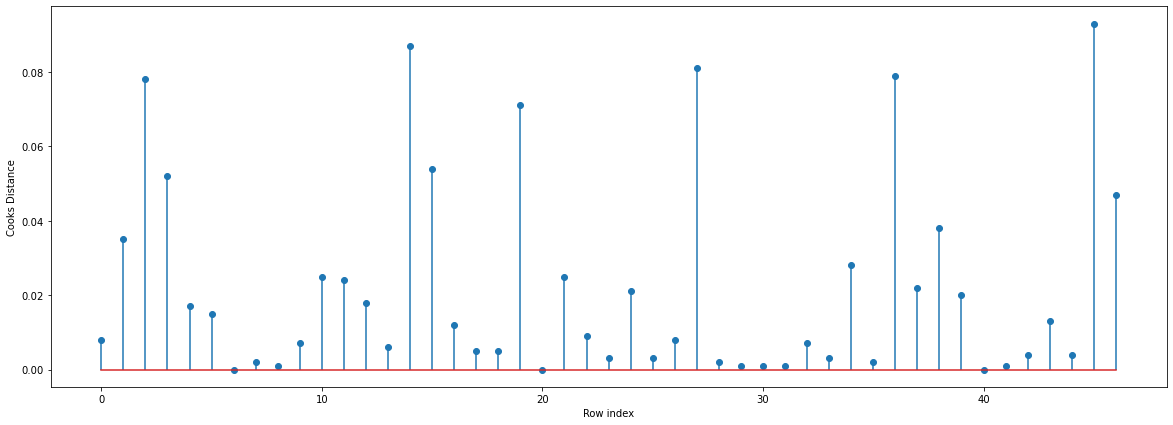

In [45]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
(np.argmax(c),np.max(c))

(45, 0.09283373205094037)

In [47]:
data3=data2.drop(data2.index[[45]],axis=0).reset_index()

In [48]:
data3=data3.drop(['index'],axis=1)

In [49]:
data3

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [50]:
# make new model with data 3 
model3=smf.ols('Profit ~ RD+Administration+Marketing',data=data3).fit()

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     360.3
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           5.56e-30
Time:                        11:31:05   Log-Likelihood:                -471.03
No. Observations:                  46   AIC:                             950.1
Df Residuals:                      42   BIC:                             957.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.69e+04   5788.198      9.830      0.000    4.52e+04    6.86e+04
RD                 0.7714      0.040     19.320      0.000       0.691       0.852
Administration    -0.0540      0.043     -1.254      0.217      -0.141       0.033
Marketing          0.0277      0.014      1.916      0.062      -0.001       0.057
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.291
Skew:                          -0.053   Prob(JB):                        0.865
Kurtosis:                       2.625   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [53]:
dl=data.drop('State',axis=1)

In [54]:
array = dl.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX)

[[1.   0.65 1.   1.  ]
 [0.98 0.76 0.94 1.  ]
 [0.93 0.38 0.86 0.99]
 [0.87 0.51 0.81 0.95]
 [0.86 0.31 0.78 0.85]
 [0.8  0.37 0.77 0.8 ]
 [0.81 0.73 0.27 0.8 ]
 [0.79 0.72 0.69 0.79]
 [0.73 0.74 0.66 0.77]
 [0.75 0.44 0.65 0.76]
 [0.62 0.45 0.49 0.74]
 [0.61 0.31 0.53 0.73]
 [0.57 0.58 0.53 0.71]
 [0.56 0.64 0.54 0.67]
 [0.73 0.8  0.54 0.66]
 [0.69 0.54 0.55 0.65]
 [0.47 0.54 0.56 0.63]
 [0.57 0.71 0.6  0.62]
 [0.55 0.48 0.63 0.62]
 [0.52 0.78 0.   0.61]
 [0.46 0.48 0.63 0.58]
 [0.47 0.78 0.64 0.54]
 [0.45 0.54 0.64 0.54]
 [0.41 0.41 0.65 0.53]
 [0.47 0.37 0.3  0.53]
 [0.39 0.67 0.29 0.52]
 [0.46 0.71 0.28 0.51]
 [0.44 0.58 0.75 0.51]
 [0.4  1.   0.25 0.5 ]
 [0.4  0.77 0.23 0.49]
 [0.37 0.49 0.19 0.48]
 [0.37 0.77 0.19 0.47]
 [0.38 0.59 0.1  0.47]
 [0.34 0.39 0.45 0.46]
 [0.28 0.81 0.45 0.46]
 [0.28 0.26 0.44 0.46]
 [0.17 0.58 0.43 0.43]
 [0.27 0.   0.42 0.42]
 [0.12 0.11 0.39 0.37]
 [0.23 0.24 0.37 0.37]
 [0.17 0.51 0.37 0.36]
 [0.17 0.25 0.35 0.36]
 [0.14 0.34 0.31 0.32]
 [0.09 0.58

In [55]:
data_normal=pd.DataFrame(rescaledX,columns=['RD','Admin','Marketing','Profit'])

In [56]:
data_normal

,RD,Admin,Marketing,Profit
0,1.000000,0.651744,1.000000,1.000000
1,0.983359,0.761972,0.940893,0.997355
2,0.927985,0.379579,0.864664,0.993178
3,0.873136,0.512998,0.812235,0.947292
4,0.859438,0.305328,0.776136,0.853171
5,0.797566,0.369448,0.769126,0.801382
6,0.814128,0.730161,0.270710,0.796490
7,0.788018,0.717457,0.686493,0.794407
8,0.729018,0.741733,0.660500,0.774468
9,0.745906,0.436929,0.646443,0.760661


In [57]:
#Make new model on normalized data
model4=smf.ols('Profit ~ RD+Admin+Marketing',data=data_normal).fit()

In [58]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        11:32:48   Log-Likelihood:                 78.973
No. Observations:                  50   AIC:                            -149.9
Df Residuals:                      46   BIC:                            -142.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1918      0.024      7.876      0.000       0.143       0.241
RD             0.7502      0.042     17.846      0.000       0.666       0.835
Admin         -0.0198      0.038     -0.526      0.602      -0.096       0.056
Marketing      0.0723      0.044      1.655      0.105      -0.016       0.160
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model4_influence=model4.get_influence()
(c, _) = model4_influence.cooks_distance

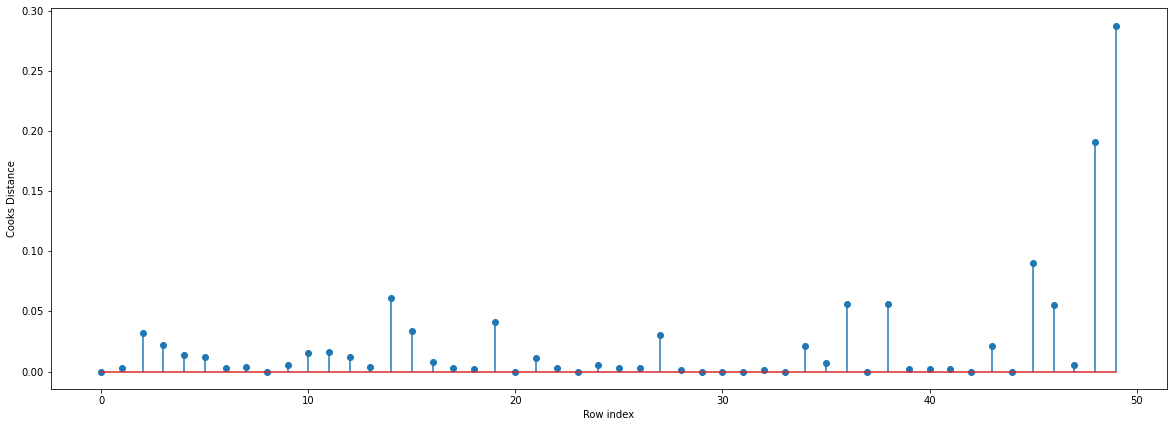

In [60]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_normal)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
np.argmax(c),np.max(c)

(49, 0.2880822927543269)

In [62]:
data_normal1=data_normal.drop(data_normal.index[[49]],axis=0).reset_index()

In [63]:
data_normal=data_normal1.drop(['index'],axis=1)

In [64]:
data_normal1

,index,RD,Admin,Marketing,Profit
0,0,1.000000,0.651744,1.000000,1.000000
1,1,0.983359,0.761972,0.940893,0.997355
2,2,0.927985,0.379579,0.864664,0.993178
3,3,0.873136,0.512998,0.812235,0.947292
4,4,0.859438,0.305328,0.776136,0.853171
5,5,0.797566,0.369448,0.769126,0.801382
6,6,0.814128,0.730161,0.270710,0.796490
7,7,0.788018,0.717457,0.686493,0.794407
8,8,0.729018,0.741733,0.660500,0.774468
9,9,0.745906,0.436929,0.646443,0.760661


In [65]:
#Make new model on normalized data 1
model5=smf.ols('Profit ~ RD+Admin+Marketing',data=data_normal).fit()

In [66]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           8.85e-32
Time:                        11:34:41   Log-Likelihood:                 85.989
No. Observations:                  49   AIC:                            -164.0
Df Residuals:                      45   BIC:                            -156.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2059      0.021      9.950      0.000       0.164       0.248
RD             0.7291      0.036     20.470      0.000       0.657       0.801
Admin         -0.0164      0.032     -0.518      0.607      -0.080       0.047
Marketing      0.0670      0.037      1.825      0.075      -0.007       0.141
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#Make new model on normalized data 1 with log transformation
model6=smf.ols('Profit ~ np.log(RD+Admin+Marketing)',data=data_normal1).fit()

In [68]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     31.94
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           9.04e-07
Time:                        11:35:07   Log-Likelihood:                 19.010
No. Observations:                  49   AIC:                            -34.02
Df Residuals:                      47   BIC:                            -30.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.5255      0.025     21.296      0.000       0.476       0.575
np.log(RD + Admin + Marketing)     0.1606      0.028      5.651      0.000       0.103       0.218
==============================================================================
Omnibus:                        2.453   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                2.115
Skew:                           0.505   Prob(JB):                        0.347
Kurtosis:                       2.879   Cond. No.                         1.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
p1=(model1.rsquared, model1.aic)
p2=(model2.rsquared, model2.aic)
p3=(model3.rsquared, model3.aic)
p4=(model4.rsquared, model4.aic)
p5=(model5.rsquared, model5.aic)
p6=(model6.rsquared, model6.aic)

d1 = {'Variables':['model 1','model 2','model 3','model 4','model 5','model6'], 'AIC Value':[p1,p2,p3,p4,p5,p6]}
rsqr = pd.DataFrame(d1)
rsqr

,Variables,AIC Value
0,model 1,"(0.9626766170294073, 994.6690439260116)"
1,model 2,"(0.9614129113440602, 973.2489443962857)"
2,model 3,"(0.962593650298269, 950.0635928720129)"
3,model 4,"(0.9507459940683246, -149.946392602919)"
4,model 5,"(0.9613162435129847, -163.97823592603302)"
5,model6,"(0.4045914767888804, -34.02066487305467)"


In [70]:
#predict new value with using of model 5 / as model 5 is higher Rsquared value and less AIC value
new_data=pd.DataFrame({'RD':596785.30,'Admin':356981.40,'Marketing':42365.20},index=[1])
pred_y=model5.predict(new_data)
pred_y

1    432076.405477
dtype: float64

In [71]:
!pip install pandas_profiling
!pip install sweetviz

In [74]:
import pandas_profiling as pp
import sweetviz as sv  

In [75]:
EDA_report= pp.ProfileReport(data_normal1)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
sweet_report = sv.analyze(data_normal1)
sweet_report.show_html('weather_report.html')

                                             |                                                                …

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
